## TASK

    1. Perform sentiment analysis on youtube coments
    2. Perform EDA on positive sentences using TextBlob and WordCloud
    3. Perform EDA on negative sentences using TextBlob and WordCloud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GBcomments = pd.read_csv(r"C:\Users\Ganu\Documents\NOTEBOOK\PYTHON\CRAZY_PLAN\data_analyst\youtube_text/GBcomments.csv", error_bad_lines = False)


b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
GBcomments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0

In [4]:
GBcomments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [5]:
GBcomments.dropna(inplace = True)

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [9]:
polarity = []

for i in GBcomments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
GBcomments['polarity'] = polarity

In [11]:
GBcomments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  polarity  
0        0  0.450000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  1.000000  
5        0  0.300000  
6        0  0.000000  
7        0 -0.100000  
8        0  0.028571  
9        0  0.500000

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)

In [15]:
postive_comments = GBcomments[GBcomments['polarity'] == 1]

In [16]:
postive_comments['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [17]:
total_positive = ''.join(postive_comments['comment_text'])

In [18]:
wrdcld_positive = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(total_positive)

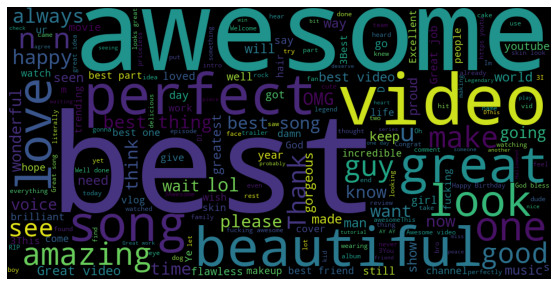

In [19]:
plt.figure(figsize = (15,5))
plt.imshow(wrdcld_positive)
plt.axis('off')
plt.show()

In [20]:
negative_comments = GBcomments[GBcomments['polarity'] == -1]

In [21]:
total_negative = ''.join(negative_comments['comment_text'])

In [22]:
wrdcld_negative = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(total_negative)

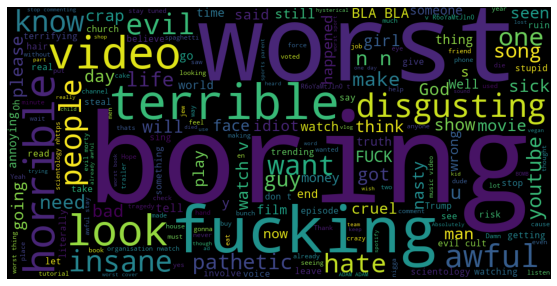

In [23]:
plt.figure(figsize = (15,5))
plt.imshow(wrdcld_negative)
plt.axis('off')
plt.show()

## TASK

    4. Analyse Tags, What are trending on Youtube?
    5. Perform analysis on likes, dislikes and views and find out the correlation between them?

In [26]:
GB_videos = pd.read_csv(r"C:\Users\Ganu\Documents\NOTEBOOK\PYTHON\CRAZY_PLAN\data_analyst\youtube_text/GBvideos.csv", error_bad_lines = False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [27]:
GB_videos.head()

video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   

       channel_title  category_id  \
0        Apple Event           28   
1       This Morning           24   
2       emmablackery           24   
3              ProZD            1   
4  Sprinkleofglitter           26   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   
2  emmablackery|emma blackery|emma|blackery|briti...   142819  13119   
3  skit|korean|language|conversation|esl|japanese...  1580028  65729   
4  sprinkleofglitter|sprinkle of glitter|baby gli...    40592   5019   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   
2       151           1141     https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg   
3      1529           3598     https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg   
4        57            490     https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [29]:
complete_tags = ''.join(GB_videos['tags'])

In [39]:
complete_tags

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real lifeemmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestryskit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorialsprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby namesRio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David Luiz

In [31]:
# Use regular expression to extract text data from the complete_tags

import re

In [40]:
tags = re.sub('[^a-zA-Z]',' ', complete_tags)

In [41]:
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios   this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real lifeemmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestryskit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorialsprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby namesRio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David Luiz

In [42]:
tags = re.sub(' +',' ', tags)

In [43]:
tags

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real lifeemmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestryskit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorialsprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby namesRio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa Pac

In [44]:
wrdcld_tags = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(tags)

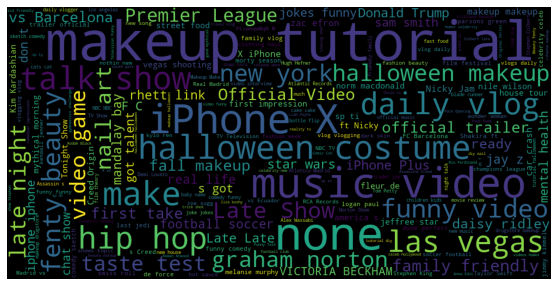

In [45]:
plt.figure(figsize = (15,5))
plt.imshow(wrdcld_tags)
plt.axis('off')
plt.show()

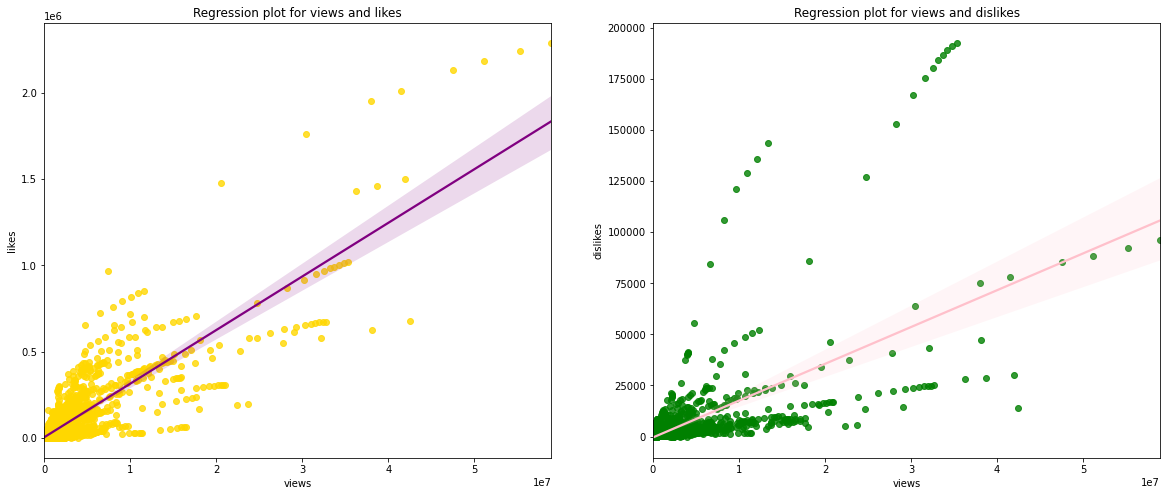

In [55]:
fig, ax = plt.subplots(figsize = (20,8))

plt.subplot(1,2,1)
sns.regplot(data = GB_videos, x = 'views', y='likes',scatter_kws={"color": "gold"}, line_kws={"color": "purple"})
plt.title("Regression plot for views and likes")

plt.subplot(1,2,2)
sns.regplot(data = GB_videos, x = 'views', y='dislikes', scatter_kws={"color": "green"}, line_kws={"color": "pink"})
plt.title("Regression plot for views and dislikes")

plt.show()

In [57]:
df_corr = GB_videos[['views','likes','dislikes']]

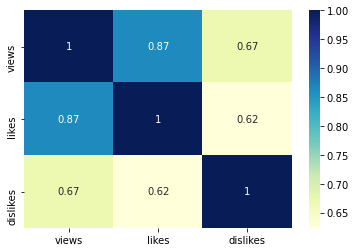

In [59]:
sns.heatmap(df_corr.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

## TASK

    6. Analyse Emoji's in comments

In [60]:
GBcomments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [62]:
GBcomments['comment_text'][1]


'To be there with a samsung phone\\n😂😂😂'

#### https://www.geeksforgeeks.org/python-program-to-print-emojis/ - We know that emoji are written as per unicode characters.

In [63]:
!pip install emoji

In [64]:
import emoji

In [76]:
comment_emoji=GBcomments['comment_text'][1]

In [77]:
[c for c in comment_emoji if c in emoji.UNICODE_EMOJI]

[]

In [79]:
str = ''
for i in GBcomments['comment_text']:
    list = [c for c in i if emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

KeyboardInterrupt: 